In [119]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import joblib 

In [2]:
### Carga de Datos
df=pd.read_csv("KAG_conversion_data.csv")

In [13]:
###Calculo de metricas nuevas y ajuste

df['CPA'] = df['Spent'] - \
    df['Approved_Conversion']

df['Coste por click'] = df['Spent'] - \
    df['Clicks']

df["CPA"]= np.where(df["CPA"]<0.00,0,df["CPA"])

In [14]:
### Modificacion del dato columnas edad y sexo

df = df.replace('30-34',32)
df = df.replace('35-39',37)
df = df.replace('40-44',42)
df = df.replace('45-49',47)
#Modificar columna Gender para que encaje con el modelo
df = df.replace('M',1)
df = df.replace('F',0)

In [3]:
### Buscar Null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [4]:
### Exploracion de Datos
print(df.shape)
df.describe()

(1143, 11)


,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [5]:
### Nos interesa analizar que campaña va a dar mas rendimiento. Tenemos la columna xyz_campaing_id (remombrar a campaña)

print(df["xyz_campaign_id"].unique())

#Son identificadores. Las renombramos por una cuesiton practica de identificacion. 

df["xyz_campaign_id"].replace({916:"campaign_A",936:"campaign_B",1178:"campaign_C"}, inplace=True)
print(df["xyz_campaign_id"].unique())

[ 916  936 1178]
['campaign_A' 'campaign_B' 'campaign_C']


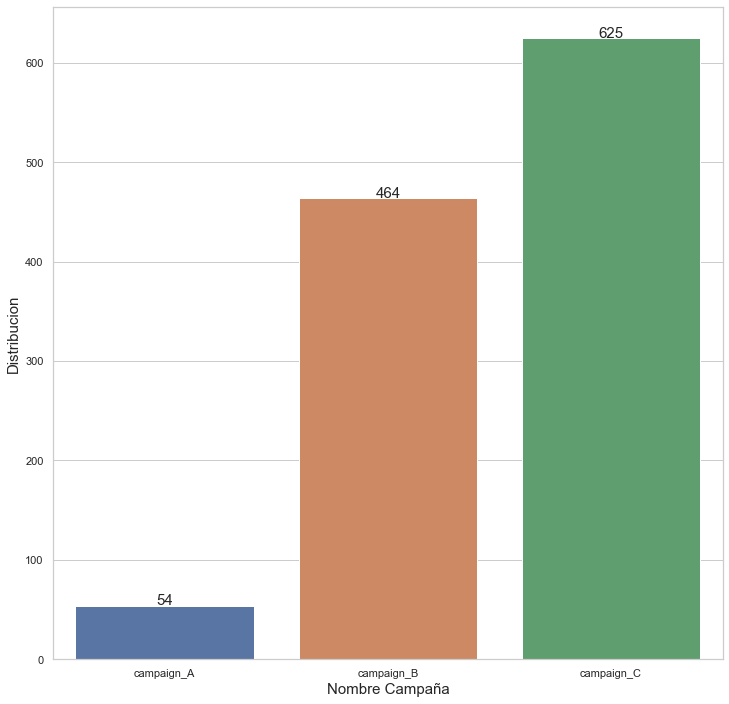

In [6]:
### Disribucion de campañas
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,12))
ax2 = sns.countplot(x ='xyz_campaign_id', data = df) 
ax2.set_xlabel('Nombre Campaña', fontsize = 15)
ax2.set_ylabel('Distribucion', fontsize = 15)
for rect in ax2.patches:
    ax2.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 15)
plt.show() 

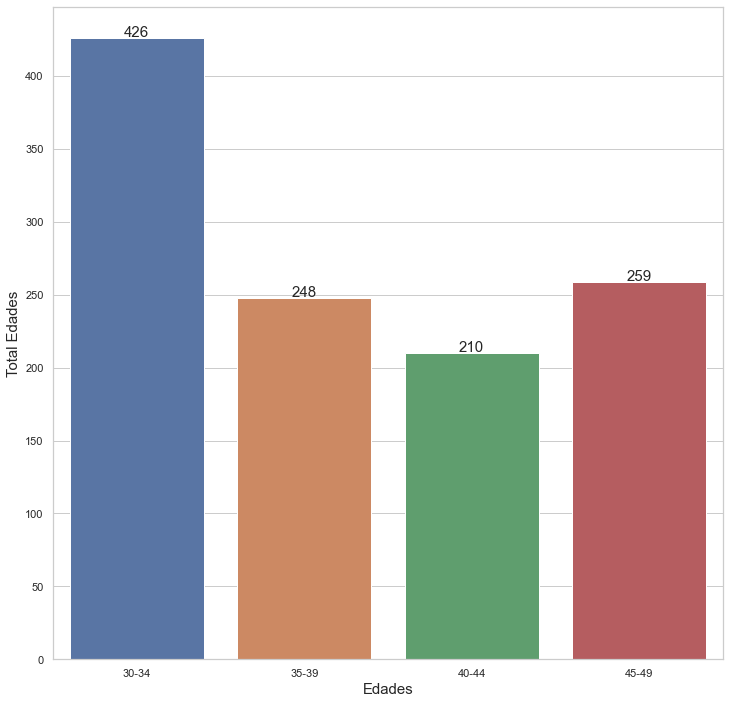

In [7]:
### Disribucion de Edades
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,12))
ax2 = sns.countplot(x ='age', data = df) 
ax2.set_xlabel('Edades', fontsize = 15)
ax2.set_ylabel('Total Edades', fontsize = 15)
for rect in ax2.patches:
    ax2.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 15)
plt.show() 

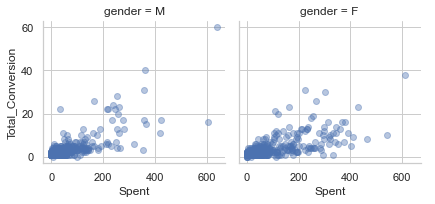

In [8]:
### Comparacion del genero con el total de conversiones
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Spent", "Total_Conversion", alpha=.4)
g.add_legend();

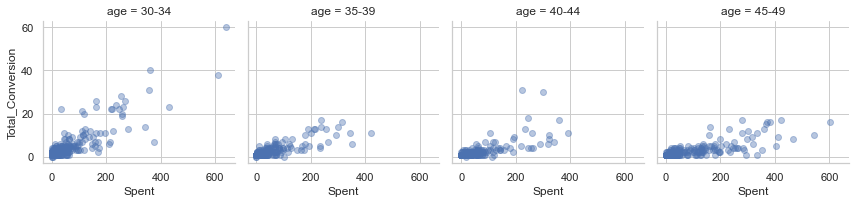

In [9]:
### Comparacion de la edad con el total de conversiones aprovadas.
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Spent", "Total_Conversion", alpha=.4)
g.add_legend();

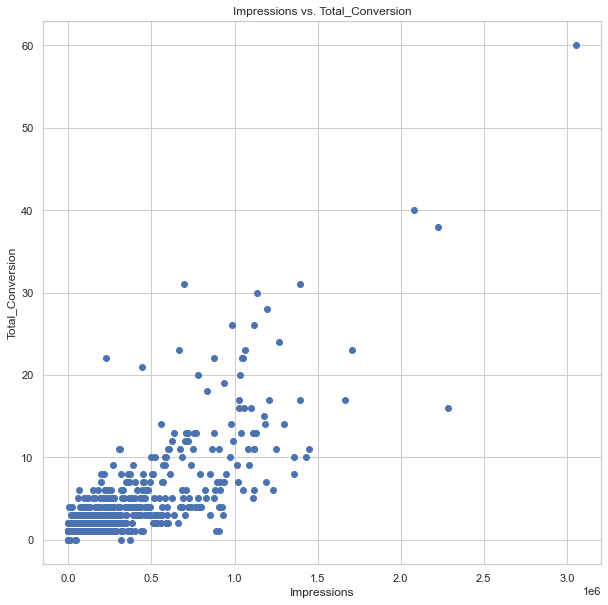

In [10]:
### Comparacion de las Impresiones (veces que sale el anuncio) con el total de conversiones aprovadas.
plt.figure(figsize=(10,10))
plt.scatter(df["Impressions"], df["Total_Conversion"])
plt.title("Impressions vs. Total_Conversion")
plt.xlabel("Impressions")
plt.ylabel("Total_Conversion")
plt.show()

C:\Users\Antonio Pol\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Antonio Pol\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Antonio Pol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

Text(0.5, 1.0, 'Violin plot')

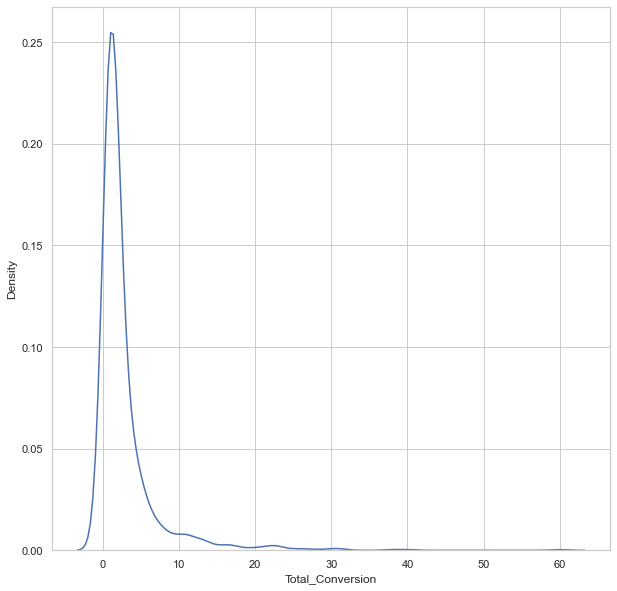

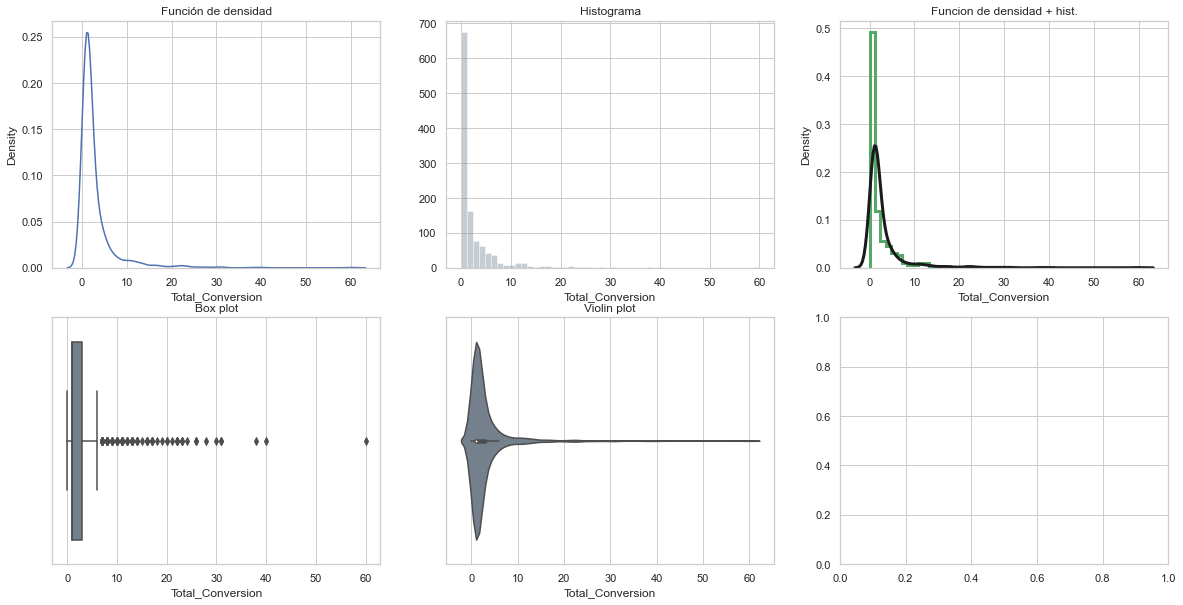

In [12]:
### Visualizar como de distribuyen las conversiones aprovadas
plt.figure(figsize=(10,10))
df_target = df["Total_Conversion"]
sns.kdeplot(df_target)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Funcion de densidad
sns.distplot(df['Total_Conversion'], hist = False, ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad")

# Histograma
sns.distplot(df['Total_Conversion'],
             kde=False,
             color='slategray',
             ax=axes[0, 1]);

axes[0, 1].set_title("Histograma")

# Funcion de densidad + histograma
sns.distplot(df['Total_Conversion'],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"},
             ax=axes[0, 2])

axes[0, 2].set_title("Funcion de densidad + hist.")

# Boxplot
sns.boxplot(df['Total_Conversion'], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot")

# Violin plot
sns.violinplot(df['Total_Conversion'], color="slategray", ax=axes[1, 1])
axes[1, 1].set_title("Violin plot")

gender                 0.027559
age                    0.066559
interest               0.120270
fb_campaign_id         0.344170
ad_id                  0.346539
Clicks                 0.694632
CPA                    0.716545
Spent                  0.725379
Coste por click        0.754823
Impressions            0.812838
Approved_Conversion    0.864034
Total_Conversion       1.000000
Name: Total_Conversion, dtype: float64


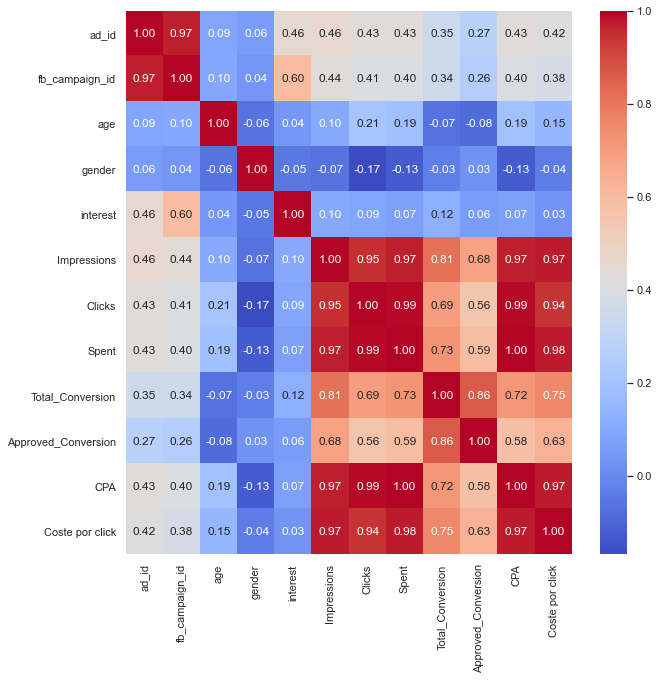

In [15]:
### Busqueda de Correlacion
plt.figure(figsize=(10,10))
g=sns.heatmap(df.corr(),annot=True ,fmt=".2f", cmap="coolwarm")
###Correlacion lineal


corr = np.abs(df.corr()['Total_Conversion']).sort_values(ascending=True)
print(corr)



In [18]:
### Modelo ML Linear Regression 

X = df[['Impressions', 'Clicks', 'Spent', 'Coste por click', 'CPA']]
y = df['Total_Conversion']

In [19]:
### Modelo ML linear Regression. Calculo Total_Conversion


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
lm = LinearRegression()

In [20]:
### Entrenamiento
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
print(lm.intercept_)

0.5222830818831197


In [22]:
print(lm.coef_)

[ 1.28375820e-05  5.09101549e-01  9.65965002e-01  4.56863453e-01
 -1.48366567e+00]


In [ ]:


print("Score del modelo (R^2):", round(lm.score(X, y), 4))
print("R^2 score:", round(r2_score(preds, y), 4))
print("MAE score:", round(mean_absolute_error(preds, y), 4))
print("MSE score:", round(mean_squared_error(preds, y), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(preds, y)), 4))

In [28]:
# Score
preds = lm.predict(X_test)

print("Score del modelo:", round(lm.score(X, y), 4))
print("R^2 score:", round(r2_score(preds, y_test), 4))
print("MAE score:", round(mean_absolute_error(preds, y_test), 4))
print("MSE score:", round(mean_squared_error(preds, y_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(preds, y_test)), 4))


Score del modelo: 0.8481
R^2 score: 0.8446
MAE score: 1.1079
MSE score: 3.3334
RMSE score: 1.8258


In [29]:
#Carga de anuncios para predecir Total_Conversion
nuevo_anuncio = np.array([[2220000, 4, 3.60, 1.80, 0.90],[10000, 2, 7.60, 4.90, 1.80], [10000, 2, 1.60, 0.90, 0.80],[11000, 78, 59.60, 0.90, 30.80]])

In [30]:
print(lm.predict(nuevo_anuncio))

[34.02265037  8.57822873  2.43865057 52.65920591]


In [120]:
#Guardar modelo linear Regression para predecir Total_Conversion
joblib.dump(lm, 'modelo_linearregression_Total_conversion.pkl')

['modelo_linearregression_Total_conversion.pkl']

In [31]:
### Modelo ML linear Regression. Calculo CPA
X2= df[['Impressions', 'Clicks', 'Spent', 'Coste por click','Total_Conversion']]
y2= df['CPA']




X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.30, random_state = 42)
lm2 = LinearRegression()

In [32]:
### Entrenamiento
lm2.fit(X_train2, y_train2)

LinearRegression()

In [33]:
print(lm2.intercept_)
print(lm2.coef_)



0.5222830818831197
[ 1.28375820e-05  5.09101549e-01  9.65965002e-01  4.56863453e-01
 -1.48366567e+00]


In [39]:
preds2 = lm2.predict(X_test2)
print("Score del modelo:", round(lm2.score(X2, y2), 4))
print("R^2 score:", round(r2_score(preds2, y_test2), 4))
print("MAE score:", round(mean_absolute_error(preds2, y_test2), 4))
print("MSE score:", round(mean_squared_error(preds2, y_test2), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(preds2, y_test2)), 4))

Score del modelo: 0.7113
R^2 score: 0.8446
MAE score: 1.1079
MSE score: 3.3334
RMSE score: 1.8258


In [40]:
nuevo_anuncio2 = np.array([[2220000, 4, 3.60, 1.80, 0.90],[10000, 2, 7.60, 4.90, 1.80], [10000, 2, 1.60, 0.90, 0.80],[11000, 78, 59.60, 0.90, 30.80]])

In [43]:
print(lm2.predict(nuevo_anuncio2))

[34.02265037  8.57822873  2.43865057 52.65920591]


In [121]:
#Guardar modelo linear Regression para predecir CPA
joblib.dump(lm2, 'modelo_linearregression_CPA.pkl')

['modelo_linearregression_CPA.pkl']

In [56]:
### Carga Data para segundo modelo 

df2=pd.read_csv("KAG_conversion_data.csv")

df2['CPA'] = df2['Spent'] - \
    df2['Approved_Conversion']

df2['Coste por click'] = df2['Spent'] - \
    df2['Clicks']



X3 = df2[['Impressions', 'Clicks', 'Spent', 'Coste por click', 'CPA']]
y3 = df2['Total_Conversion']

df2["CPA"]= np.where(df2["CPA"]<0.00,0,df2["CPA"])

In [60]:
### Modelo ML Random Forest Regression. Calculo Total_Conversion
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.30, random_state = 42)
rfr = RandomForestRegressor(n_estimators = 30, random_state = 20, max_depth = 5)


In [61]:
### Entrenamiento
rfr.fit(X_train3, y_train3)

RandomForestRegressor(max_depth=5, n_estimators=30, random_state=20)

In [62]:
arbolpreds = rfr.predict(X_test3)
print("Score del modelo:", round(rfr.score(X3, y3), 4))
print("R^2 score:", round(r2_score(arbolpreds, y_test3), 4))
print("MAE score:", round(mean_absolute_error(arbolpreds, y_test3), 4))
print("MSE score:", round(mean_squared_error(arbolpreds, y_test3), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(arbolpreds, y_test3)), 4))

Score del modelo: 0.767
R^2 score: 0.2759
MAE score: 1.1749
MSE score: 8.3798
RMSE score: 2.8948


In [54]:
nuevo_anuncio3 = np.array([[2220000, 4, 3.60, 1.80, 0.90],[10000, 2, 7.60, 4.90, 1.80], [10000, 2, 1.60, 0.90, 0.80],[11000, 78, 59.60, 0.90, 30.80]])

In [55]:
print(rfr.predict(nuevo_anuncio3))

[21.28724359  1.49912363  1.08388041  1.11182918]


In [122]:
#Guardar modelo Random Forest Regression para predecir Total_Conversion
joblib.dump(rfr, 'modelo_randomforestregression_Total_conversion.pkl')

['modelo_randomforestregression_Total_conversion.pkl']

In [64]:
### Modelo ML Random Forest Regression. Calculo CPA
X4= df2[['Impressions', 'Clicks', 'Spent', 'Coste por click','Total_Conversion']]
y4= df2['CPA']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.30, random_state = 42)
rfr2 = RandomForestRegressor(n_estimators = 30, random_state = 20, max_depth = 5)

In [65]:
### Entrenamiento
rfr2.fit(X_train4, y_train4)


RandomForestRegressor(max_depth=5, n_estimators=30, random_state=20)

In [66]:
arbolpreds2 = rfr2.predict(X_test4)
print("Score del modelo:", round(rfr2.score(X4, y4), 4))
print("R^2 score:", round(r2_score(arbolpreds2, y_test4), 4))
print("MAE score:", round(mean_absolute_error(arbolpreds2, y_test4), 4))
print("MSE score:", round(mean_squared_error(arbolpreds2, y_test4), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(arbolpreds2, y_test4)), 4))

Score del modelo: 0.998
R^2 score: 0.9955
MAE score: 1.699
MSE score: 34.0255
RMSE score: 5.8331


In [67]:
nuevo_anuncio4 = np.array([[2220000, 4, 3.60, 1.80, 0.90],[10000, 2, 7.60, 4.90, 1.80], [10000, 2, 1.60, 0.90, 0.80],[11000, 78, 59.60, 0.90, 30.80]])

In [68]:
print(rfr2.predict(nuevo_anuncio4))

[ 3.79027868  7.445078    0.56303841 59.85544391]


In [123]:
#Guardar modelo Random Forest Regression para predecir CPA
joblib.dump(rfr2, 'modelo_randomforestregression_CPA.pkl')

['modelo_randomforestregression_CPA.pkl']

In [99]:
### Carga Data para tercer modelo. Support Vector Regression 

df3=pd.read_csv("KAG_conversion_data.csv")
df3['CPA'] = df3['Spent'] - \
    df3['Approved_Conversion']

df3['Coste por click'] = df3['Spent'] - \
    df3['Clicks']

df3["CPA"]= np.where(df3["CPA"]<0.00,0,df3["CPA"])

X5 = df3[['Impressions', 'Clicks', 'Spent', 'Coste por click', 'CPA']]
y5 = df3['Total_Conversion']

In [109]:
### Modelo ML Support Vector Regression. Calculo Total_Conversion
n_samples, n_features = 8 , 2
X5= df3[['Impressions', 'Clicks', 'Spent', 'Coste por click', 'CPA']]
y5 = df3['Total_Conversion']
regr = make_pipeline(StandardScaler(), SVR(kernel = 'linear', C=100, epsilon=0.2))
regr.fit(X5, y5)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, epsilon=0.2, kernel='linear'))])

In [110]:
### Score 
regr.score(X5, y5)

0.8110635352036961

In [111]:
nuevo_anuncio4 = np.array([[2220000, 4, 3.60, 1.80, 0.90],[10000, 2, 7.60, 4.90, 1.80], [10000, 2, 1.60, 0.90, 0.80],[11000, 78, 59.60, 0.90, 30.80]])

In [112]:
print(regr.predict(nuevo_anuncio4))

[40.10841358  4.9823803   2.18586263 32.75142956]


In [124]:
#Guardar modelo Support Vector Regression para predecir Total_Conversion
joblib.dump(regr, 'modelo_supportvectorregression_Total_conversion.pkl')

['modelo_supportvectorregression_Total_conversion.pkl']

In [113]:
### Modelo ML Support Vector Regression. Calculo CPA
X6= df3[['Impressions', 'Clicks', 'Spent', 'Coste por click','Total_Conversion']]
y6= df3['CPA']

In [114]:
### Modelo ML Support Vector Regression. Calculo CPA
n_samples, n_features = 8 , 2
X6= df3[['Impressions', 'Clicks', 'Spent', 'Coste por click','Total_Conversion']]
y6= df3['CPA']
regr2 = make_pipeline(StandardScaler(), SVR(kernel = 'linear', C=100, epsilon=0.2))
regr2.fit(X6, y6)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, epsilon=0.2, kernel='linear'))])

In [115]:
### Score 
regr2.score(X6, y6)

0.999901530382813

In [116]:
nuevo_anuncio5 = np.array([[2220000, 4, 3.60, 1.80, 0.90],[10000, 2, 7.60, 4.90, 1.80], [10000, 2, 1.60, 0.90, 0.80],[11000, 78, 59.60, 0.90, 30.80]])

In [117]:
print(regr2.predict(nuevo_anuncio5))

[ 4.30951167  6.67243067  2.30280761 62.07226383]


In [125]:
#Guardar modelo Support Vector Regression para predecir CPA
joblib.dump(regr2, 'modelo_supportvectorregression_CPA.pkl')

['modelo_supportvectorregression_CPA.pkl']